# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
completed_study_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
#completed_study_df
# Display the data table for preview


In [23]:
# Checking the number of mice.
num_mice = len(completed_study_df["Mouse ID"].unique())
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse_id_num = completed_study_df[completed_study_df.duplicated(subset = ["Mouse ID", 
                                                           "Timepoint"])]["Mouse ID"].unique()
dup_mouse_id_num

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse_data = completed_study_df[completed_study_df['Mouse ID'] == 'g989']
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_completed_study_df = completed_study_df[completed_study_df['Mouse ID'].isin(dup_mouse_id_num) == False]
## Removed all duplicated values
clean_completed_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Checking the number of mice in the clean DataFrame.
len(clean_completed_study_df['Mouse ID'].unique())

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_vol_per_drug = clean_completed_study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': 'mean'})
mean_tumor_vol_per_drug

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats = clean_completed_study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':
                                                                    ['mean', 'median', 'var',
                                                                     'std', 'sem']})
summary_table = tumor_stats.round(2)
summary_table

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

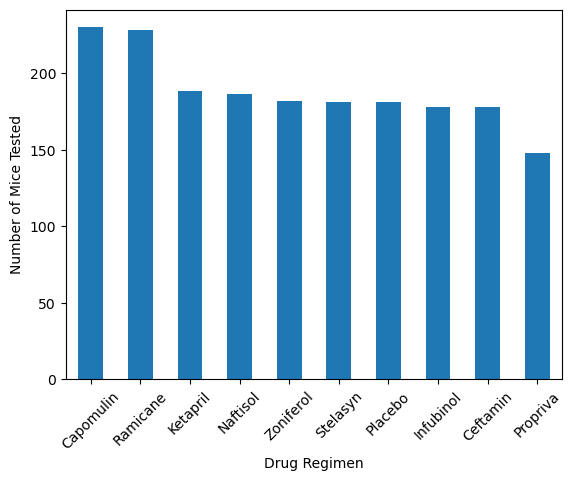

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
dr_counts = clean_completed_study_df['Drug Regimen'].value_counts()
#dr_counts
dr_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=45)
plt.ylabel('Number of Mice Tested')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

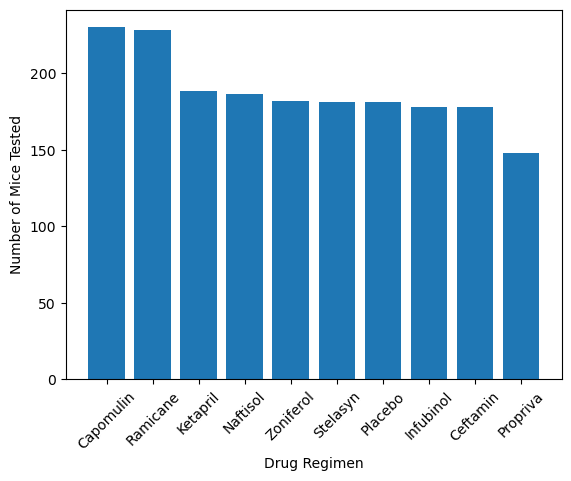

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
## Value is reset
dr_counts = clean_completed_study_df['Drug Regimen'].value_counts()
plt.bar(dr_counts.index.values, dr_counts.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=45)
plt.ylabel('Number of Mice Tested')
plt.show

<Axes: ylabel='count'>

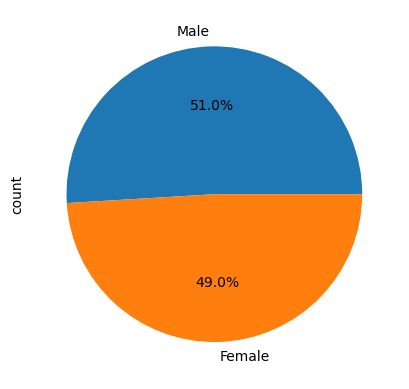

In [53]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
dr_counts = clean_completed_study_df.Sex.value_counts()
#dr_counts

# Make the pie chart
dr_counts.plot(kind='pie', autopct='%1.1f%%')

<function matplotlib.pyplot.show(close=None, block=None)>

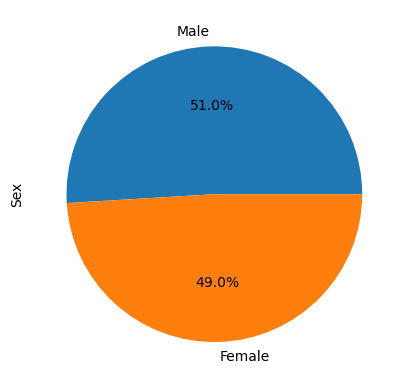

In [61]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
dr_counts = clean_completed_study_df.Sex.value_counts()

# Make the pie chart
plt.pie(dr_counts.values, labels=dr_counts.index.values, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


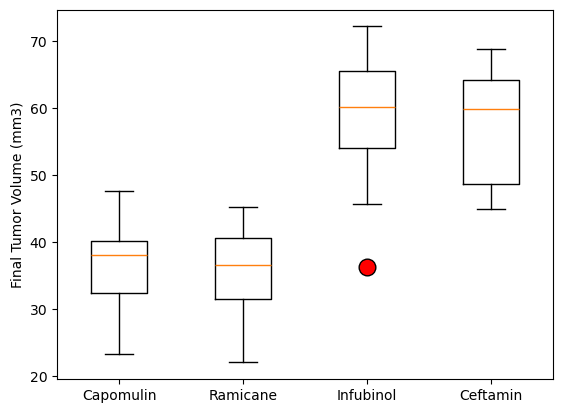

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

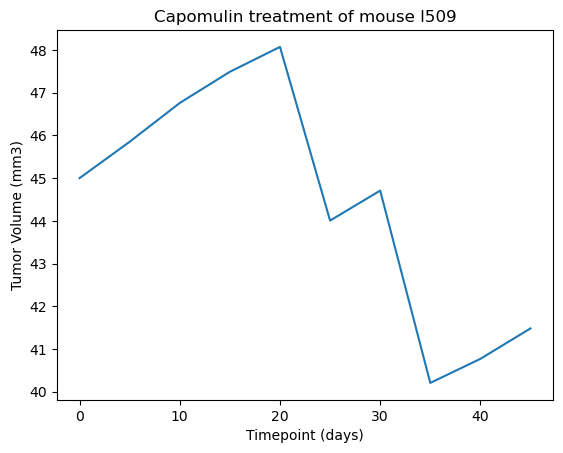

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


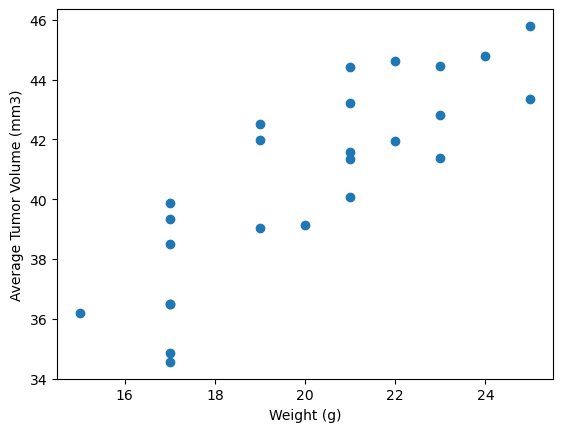

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


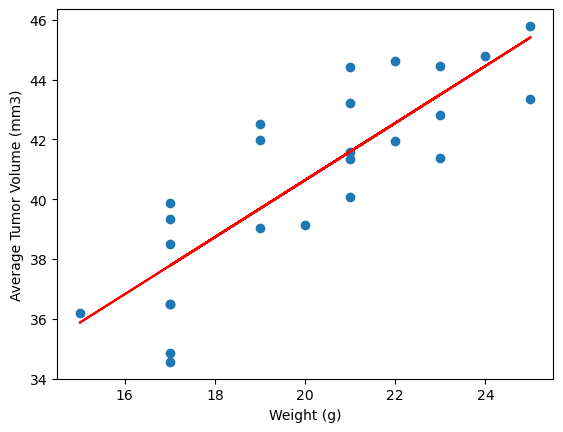

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
